# **ETAPA 1: DATASET E TOKENRIZAÇÃO**
---
---

## **1.Coleta e Limpeza**

In [ ]:
# Importando bibliotecas necessárias
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

O dataset utilizado contém respostas de estudantes do curso de direito a um questionário sobre o uso de Inteligência Artificial (IA) no âmbito jurídico e acadêmico. As informações coletadas incluem opiniões sobre a aplicabilidade da IA em diferentes contextos, ferramentas utilizadas, e perspectivas futuras. O objetivo principal deste dataset é analisar a percepção e o conhecimento dos estudantes sobre a IA, bem como identificar os principais temas e preocupações relacionados ao assunto.

In [ ]:
# Dataset: Opiniões de Estudantes de Direito sobre IA no ensino jurídico
#
# Este dataset contém respostas de estudantes de direito da instituição UNI-RN a um questionário aplicado no primeiro semestre de 2024.
# As respostas foram coletadas em formato de texto livre e estruturado, permitindo uma análise das opiniões sobre a IA no contexto jurídico.
#
# Importando o dataset direto do Google Drive
!gdown https://drive.google.com/uc?id=1f0DTC-HYQGk9S6jMf-c6K_6Sy1FdK-6t

Downloading...
From: https://drive.google.com/uc?id=1f0DTC-HYQGk9S6jMf-c6K_6Sy1FdK-6t
To: /content/EXPERIÊNCIA COM INTELIGÊNCIA ARTIFICIAL E TECNOLOGIA.xlsx
100% 55.7k/55.7k [00:00<00:00, 3.89MB/s]


In [ ]:
# Lendo e salvando os dados originais em 'raw_data' e os manipuláveis na variável 'data'
raw_data = pd.read_excel('EXPERIÊNCIA COM INTELIGÊNCIA ARTIFICIAL E TECNOLOGIA.xlsx')
data = raw_data.copy()

## **2.Análise Exploratória dos Dados**

Iniciamos a análise exploratória de dados obtendo as principais informações do dataset.

In [ ]:
# Obtendo as informações sobre os tipos dos dados e contagem inicial
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/hora    237 non-null    datetime64[ns]
 1   E-mail       237 non-null    object        
 2   Matrícula    186 non-null    object        
 3   Pergunta_1   237 non-null    object        
 4   Pergunta_2   237 non-null    object        
 5   Pergunta_3   237 non-null    object        
 6   Pergunta_4   13 non-null     object        
 7   Pergunta_5   237 non-null    object        
 8   Pergunta_6   237 non-null    object        
 9   Pergunta_7   7 non-null      object        
 10  Pergunta_8   237 non-null    object        
 11  Pergunta_9   237 non-null    object        
 12  Pergunta_10  90 non-null     object        
 13  Pergunta_11  237 non-null    object        
 14  Pergunta_12  237 non-null    object        
 15  Pergunta_13  237 non-null    object        
 16  Pergunta

In [ ]:
# Excluir colunas desnecessárias
data = data.drop(columns=['Data/hora', 'E-mail'])

Dicionário de Perguntas do questionário

* Pergunta_1 - Qual seu grau de familiaridade com a inteligência artificial?
* Pergunta_2 - Com que frequência você utiliza ferramentas de IA no seu cotidiano acadêmico ou profissional?
* Pergunta_3 - De que maneira você acredita que a inteligência artificial pode afetar o ensino universitário jurídico? (Múltipla escolha com opção de resposta aberta)
* Pergunta_4 - Caso tenha assinalado a opção "Outros", detalhe.<font color='yellow'>(Resposta aberta)</font>
* Pergunta_5 - Até que ponto você concorda que a IA tem o potencial de melhorar o ensino jurídico?
* Pergunta_6 - Em sua opinião, qual área do ensino jurídico mais se beneficiaria com a IA?
* Pergunta_7 - Caso tenha assinalado a opção "Outros", detalhe.<font color='yellow'>(Resposta aberta)</font>
* Pergunta_8 - Quais são os principais desafios ou preocupações com a IA no ensino jurídico? <font color='yellow'>(Resposta aberta)</font>
* Pergunta_9 - Sua instituição utiliza tecnologia no ensino jurídico atualmente?
* Pergunta_10 - Se sim, que tipos de tecnologias são utilizadas? <font color='yellow'>(Resposta aberta)</font>
* Pergunta_11 - Qual a proporção de seus estudos ou práticas profissionais que incorpora alguma forma de tecnologia digital ou IA atualmente? (Escolha uma opção)
* Pergunta_12 - Você já participou de algum curso ou treinamento sobre IA aplicada ao direito?
* Pergunta_13 - Se a IA se tornasse uma ferramenta comum no ensino jurídico, você estaria interessado em participar de cursos ou treinamentos específicos?
* Pergunta_14 - Em uma escala de 1 a 5, como você avaliaria a preparação da sua instituição para a integração da IA no ensino jurídico? (1 sendo "não preparada" e 5 "muito preparada")
* Pergunta_15 - Quais competências você acredita serem as mais importantes para profissionais do direito no contexto da IA? (Classifique as competências)
* Pergunta_16 - Se a IA se tornasse uma ferramenta comum no ensino jurídico, você estaria interessado em participar de cursos ou treinamentos específicos?
* Pergunta_17 - Quais habilidades-chave os futuros profissionais do direito precisarão para se adaptar ao ambiente jurídico impulsionado pela IA? <font color='yellow'>(Resposta aberta)</font>
* Pergunta_18 - Há alguma outra informação ou opinião que você gostaria de compartilhar sobre o tema? <font color='yellow'>(Resposta aberta)</font>

In [ ]:
# O dataset tem linhas repetidas?
data.duplicated().value_counts()

,count
False,237


Observa-se que o dataset não apresenta nenhuma linha duplicada, dentre as 237 linhas.

In [ ]:
# Quais colunas apresentam valores nulos?
data.isna().sum()

,0
Matrícula,51
Pergunta_1,0
Pergunta_2,0
Pergunta_3,0
Pergunta_4,224
Pergunta_5,0
Pergunta_6,0
Pergunta_7,230
Pergunta_8,0
Pergunta_9,0


Considerando colunas com valores nulos, temos 5 colunas. Mas isso não interfere na utilização que faremos das respostas em passos seguintes da tarefa.

### **2.1.Distribuição das respostas para perguntas objetivas**

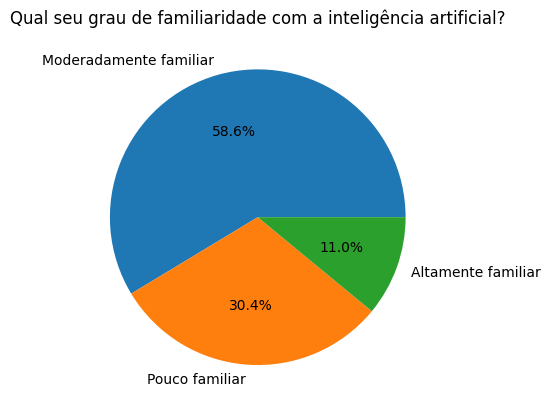

In [ ]:
# Agrupando a distribuição das respostas para a Pergunta_1
count1 = data['Pergunta_1'].value_counts()

# Cria um gráfico de pizza com a proporção das respostas
plt.pie(count1, labels=data['Pergunta_1'].value_counts().index, autopct='%1.1f%%')
plt.title('Qual seu grau de familiaridade com a inteligência artificial?')

# Mostra o Gráfico
plt.show()

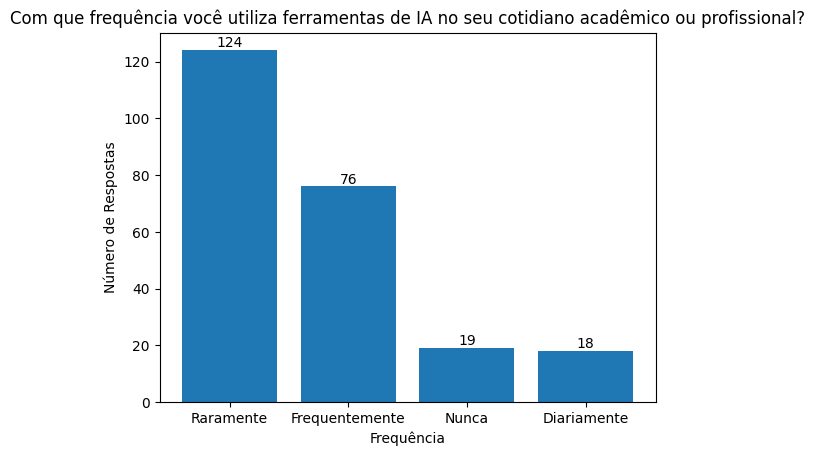

In [ ]:
# Agrupa a frequência de cada resposta para a 'Pergunta_2'
count2 = data['Pergunta_2'].value_counts()

#Cria um Gráfico de Barras com a distribuição das respostas
plt.bar(count2.index, count2.values)
plt.xlabel('Frequência')
plt.ylabel('Número de Respostas')
plt.title('Com que frequência você utiliza ferramentas de IA no seu cotidiano acadêmico ou profissional?')

# Adiciona o número de respostas para cada alternativa
for index, value in enumerate(count2.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostra o Gráfico
plt.show()

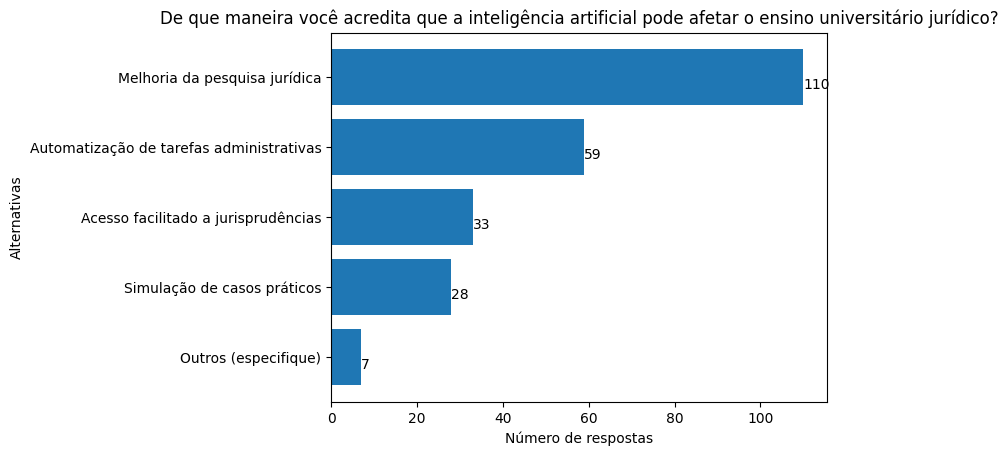

In [ ]:
# Conta a frequência das respostas da 'Pergunta_3' e ordena em ordem decrescente
count3 = data['Pergunta_3'].value_counts().sort_values(ascending=False)

# Cria barras horizontais com as alternativas no eixo Y e contagens no eixo X
plt.barh(count3.index, count3.values)
plt.xlabel('Número de respostas')
plt.ylabel('Alternativas')
plt.title('De que maneira você acredita que a inteligência artificial pode afetar o ensino universitário jurídico?')
plt.gca().invert_yaxis()

# Adiciona valores numéricos ao final de cada barra
for index, value in enumerate(count3.values):
    plt.text(value, index, str(value), va='top')

# Mostra o gráfico
plt.show()

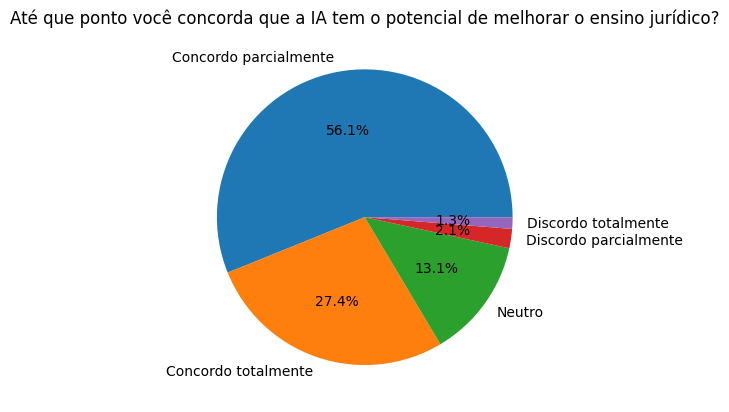

In [ ]:
#Calcula a frequência de cada resposta para a Pergunta_5
data['Pergunta_5'].value_counts()

# Cria um gráfico de pizza com a proporção das respostas
plt.pie(data['Pergunta_5'].value_counts(), labels=data['Pergunta_5'].value_counts().index, autopct='%1.1f%%')
plt.title('Até que ponto você concorda que a IA tem o potencial de melhorar o ensino jurídico?')

# Mostra o gráfico
plt.show()

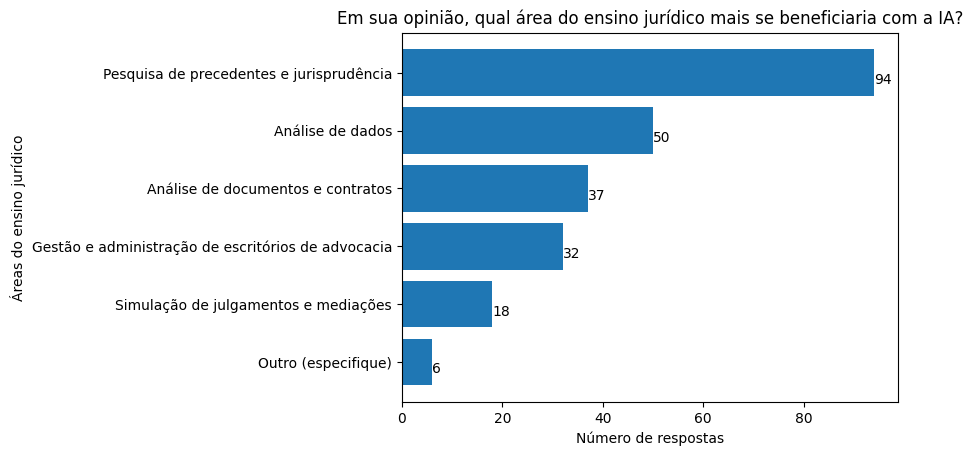

In [ ]:
# Agrupando a distribuição das respostas para essa pergunta
count6 = data['Pergunta_6'].value_counts()

#Cria um Gráfico de Barras com a distribuição das respostas
plt.barh(count6.index, count6.values)
plt.xlabel('Número de respostas')
plt.ylabel('Áreas do ensino jurídico')
plt.title('Em sua opinião, qual área do ensino jurídico mais se beneficiaria com a IA?')
plt.gca().invert_yaxis()

# Adiciona os valores numéricos ao final de cada barra
for index, value in enumerate(count6.values):
    plt.text(value, index, str(value), va='top')

# Mostra o gráfico
plt.show()

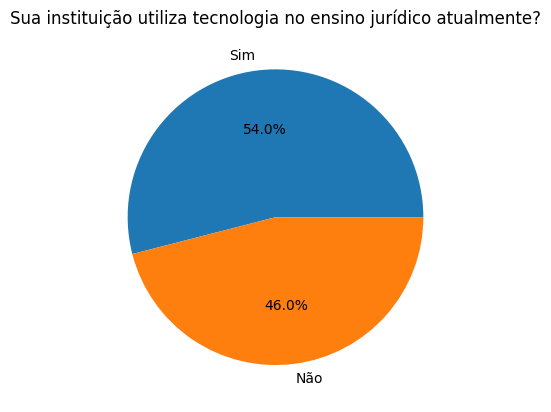

In [ ]:
# Conta a frequência de cada resposta na coluna Pergunta_9
data['Pergunta_9'].value_counts()

# Cria um gráfico de pizza com a proporção das respostas
plt.pie(data['Pergunta_9'].value_counts(), labels=data['Pergunta_9'].value_counts().index, autopct='%1.1f%%')
plt.title('Sua instituição utiliza tecnologia no ensino jurídico atualmente?')

# Mostra o gráfico
plt.show()

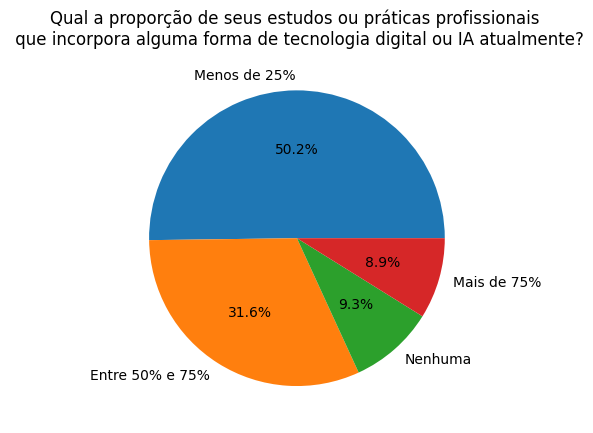

In [ ]:
# Conta a frequência de cada resposta na coluna Pergunta_11
data['Pergunta_11'].value_counts()

# Cria um gráfico de pizza com a proporção das respostas
plt.pie(data['Pergunta_11'].value_counts(), labels=data['Pergunta_11'].value_counts().index, autopct='%1.1f%%')
plt.title('Qual a proporção de seus estudos ou práticas profissionais \n que incorpora alguma forma de tecnologia digital ou IA atualmente?')

# Mostra o gráfico
plt.show()

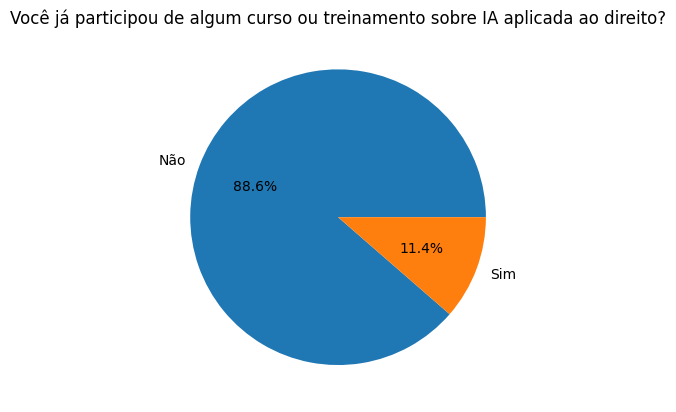

In [ ]:
# Conta a frequência de cada resposta na coluna Pergunta_12
data['Pergunta_12'].value_counts()

# Cria um gráfico de pizza para mostrar a distribuição das respostas para a Pergunta_12
plt.pie(data['Pergunta_12'].value_counts(), labels=data['Pergunta_12'].value_counts().index, autopct='%1.1f%%')
plt.title('Você já participou de algum curso ou treinamento sobre IA aplicada ao direito?')

# Exibe o gráfico de pizza
plt.show()

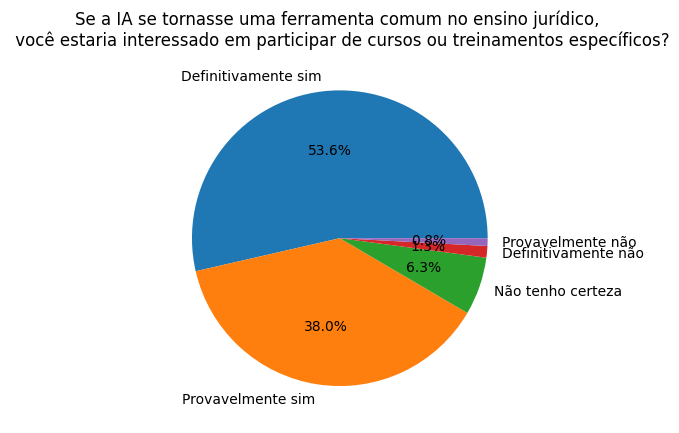

In [ ]:
# Conta a frequência de cada resposta na coluna Pergunta_13
data['Pergunta_13'].value_counts()

# Cria um gráfico de pizza para mostrar a distribuição das respostas para a Pergunta_13
plt.pie(data['Pergunta_13'].value_counts(), labels=data['Pergunta_13'].value_counts().index, autopct='%1.1f%%')
plt.title('Se a IA se tornasse uma ferramenta comum no ensino jurídico, \n você estaria interessado em participar de cursos ou treinamentos específicos?')

# Exibe o gráfico de pizza
plt.show()

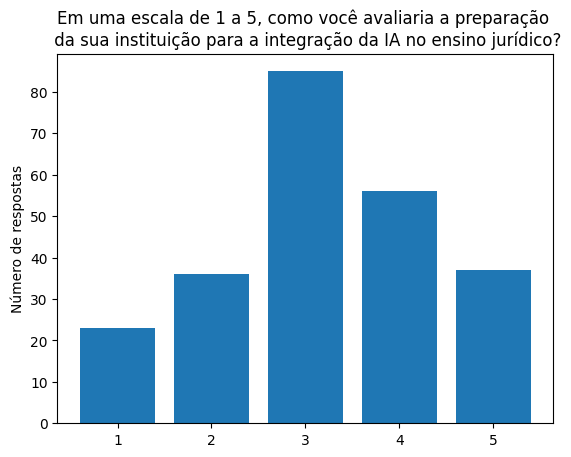

In [ ]:
# Agrupando a distribuição das respostas da coluna 'Pergunta 14'
count14 = data['Pergunta_14'].value_counts()

# Cria um Gráfico de Barras com a distribuição das respostas
plt.bar(count14.index, count14.values)
plt.xlabel(None)
plt.ylabel('Número de respostas')
plt.title('Em uma escala de 1 a 5, como você avaliaria a preparação \n da sua instituição para a integração da IA no ensino jurídico?')
plt.show()

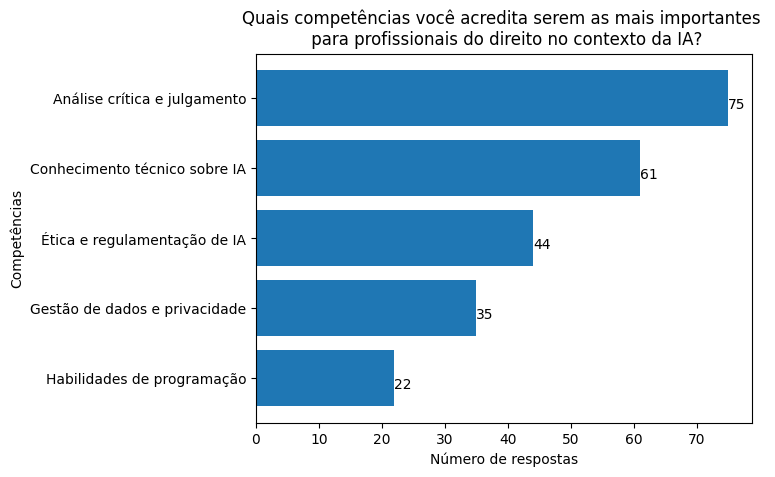

In [ ]:
# Conta as respostas na coluna 'Pergunta_15' ordenando a contantagem de forma decrescente
count15 = data['Pergunta_15'].value_counts().sort_values(ascending=False)

# Cria um gráfico de barras horizontal
plt.barh(data['Pergunta_15'].value_counts().index, data['Pergunta_15'].value_counts().values)
plt.xlabel('Número de respostas')
plt.ylabel('Competências')
plt.title('Quais competências você acredita serem as mais importantes \n para profissionais do direito no contexto da IA?')

# Insere os valores das contagens ao lado das barras no gráfico
for index, value in enumerate(count15.values):
    plt.text(value, index, str(value), va='top')

# Inverte a ordem do eixo Y para que os valores com maior frequência apareçam no topo do gráfico.
plt.gca().invert_yaxis()

# Mostra o gráfico
plt.show()

## **3.Pré-Processamento**

### **3.1.Criação e tratamento do corpus**

Nesta etapa, estamo juntando todos os textos em um só corpus e utilizando expressões regulares para realizar correções textuais.

In [ ]:
# Concatena as respostas de diferentes perguntas
all_strings_from_pergunta_4 = data['Pergunta_4'].str.cat(sep='. ')
all_strings_from_pergunta_7 = data['Pergunta_7'].str.cat(sep='. ')
all_strings_from_pergunta_8 = data['Pergunta_8'].str.cat(sep='. ')
all_strings_from_pergunta_10 = data['Pergunta_10'].str.cat(sep='. ')
all_strings_from_pergunta_17 = data['Pergunta_17'].str.cat(sep='. ')
all_strings_from_pergunta_18 = data['Pergunta_18'].str.cat(sep='. ')

# Cria o corpus concatenado com quebras de linha entre as perguntas
corpus = (
    all_strings_from_pergunta_4 + '\n' +
    all_strings_from_pergunta_7 + '\n' +
    all_strings_from_pergunta_8 + '\n' +
    all_strings_from_pergunta_10 + '\n' +
    all_strings_from_pergunta_17 + '\n' +
    all_strings_from_pergunta_18
)

#Expressões Regulares para rúidos no texto

#Transforma tudo em lower case
corpus = corpus.lower()

#Deleta palavras repetidas
corpus = re.sub(r'\b(\w+)( \1\b)+', r'\1', corpus)

# Substitui múltiplos pontos por um apenas
#corpus = re.sub(r'\.+', '.', corpus)

# Substitui múltiplos espaços por um apenas, mas preserva as quebras de linha
corpus = re.sub(r'\s{2,}', ' ', corpus)

# Adiciona um espaço depois de pontos e vírgulas, se não houver nenhum
corpus = re.sub(r'([.,])(\S)', r'\1 \2', corpus)

# Remove espaço antes de ponto e vírgula
corpus = re.sub(r'\s+([.,])', r'\1', corpus)

# Substitui múltiplo pontos por um só
corpus = re.sub(r'\.+', '.', corpus)



print(corpus)


acho que pode afetar de maneira negativa, ias apesar do que muitos pensam não respondem perguntas com 100% de precisão e nem possuem um banco de dados totalmente seguro, na maioria das vezes pegam informações de fácil acesso ou falsas informações que circulam como conhecimento comum muitas vezes erroneamente. além de ainda não serem capazes de fazer uma análise completamente objetiva nem subjetiva de textos. também utilizo como ferramenta de aprimoramento de textos, ajudando na correção de palavras (ortografia) e no âmbito profissional, ajudo a criar textos mais interativos ou até dar ideias de alguns conteudos. deturpando casos concretos e dificultando o contato humano entre o direito e aquele que o procura. acredito que, como já é de fato uma realidade, a incorporação da ia no mundo acadêmico deveria ser iniciada. assim como qualquer outros âmbitos, a ia também tem seu lado negativo, o que é inevitável. porém, acredito que trabalhar seu lado positivo seria de grande importância e rel

### **3.2.Tokenrização**

In [ ]:
tokens = corpus.split()
print(tokens)

['acho', 'que', 'pode', 'afetar', 'de', 'maneira', 'negativa,', 'ias', 'apesar', 'do', 'que', 'muitos', 'pensam', 'não', 'respondem', 'perguntas', 'com', '100%', 'de', 'precisão', 'e', 'nem', 'possuem', 'um', 'banco', 'de', 'dados', 'totalmente', 'seguro,', 'na', 'maioria', 'das', 'vezes', 'pegam', 'informações', 'de', 'fácil', 'acesso', 'ou', 'falsas', 'informações', 'que', 'circulam', 'como', 'conhecimento', 'comum', 'muitas', 'vezes', 'erroneamente.', 'além', 'de', 'ainda', 'não', 'serem', 'capazes', 'de', 'fazer', 'uma', 'análise', 'completamente', 'objetiva', 'nem', 'subjetiva', 'de', 'textos.', 'também', 'utilizo', 'como', 'ferramenta', 'de', 'aprimoramento', 'de', 'textos,', 'ajudando', 'na', 'correção', 'de', 'palavras', '(ortografia)', 'e', 'no', 'âmbito', 'profissional,', 'ajudo', 'a', 'criar', 'textos', 'mais', 'interativos', 'ou', 'até', 'dar', 'ideias', 'de', 'alguns', 'conteudos.', 'deturpando', 'casos', 'concretos', 'e', 'dificultando', 'o', 'contato', 'humano', 'entre',

Este é o tamanho de nosso vocabulário aplicando token=palavra.

In [ ]:
tokens = re.findall(r"[\w']+", corpus)
print(len(tokens))

9457


In [ ]:
from collections import Counter #courterizador de palavras
import plotly.graph_objects as go

def plot_histogram_word(text_list, n_most_common=30):
    # Cria uma lista de todas as palavras de todos os textos
    words = [word for txt in text_list for word in txt.split()]

    # Conta a frequência de cada palavra
    word_counts = Counter(words)

    # Seleciona o top 'n' palavras mais frequentes
    top_words = dict(word_counts.most_common(n_most_common))

    # Cria um gráfico de barras utilizando o Plotly
    fig = go.Figure([go.Bar(
        x=list(top_words.keys()),
        y=list(top_words.values()),
        text=list(top_words.values()),  # Mostra a contagem de cada barra
        textposition='auto'
    )])

    # Customização do layout
    fig.update_layout(
        title_text=f'Top {n_most_common} most frequent words in the text',
        title_x=0.5,  # Centraliza o título
        xaxis_title="Words",
        yaxis_title="Frequency",
        xaxis_tickangle=-45  # Rotaciona os rótulos do eixo x para faciliar a leitura
    )

    # Mostra o gráfico
    fig.show()

# Chama a função com os dados de treino limpos
plot_histogram_word(tokens, 30)

Vemos que as palavras mais frequentes são palavras que carregam pouco valor semântico. Portanto iremos aplicar o método `stopwords` que normaliza gênero e grau das palavras, e utiliza um filtro para retirar essas palavras com pouco significado da distribuição de palavras.

In [ ]:
import nltk
from nltk.corpus import stopwords

# Lista de stopwords em português
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Filtrar os tokens removendo as stopwords
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

plot_histogram_word(filtered_tokens, 30)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Podemos ver que temos um resultado bem melhor. E, também temos uma diminuição de mais de 3000 palavras do nosso vocabulário.

Agora, vamos ver quais são os 10 bigramas mais frequentes de nosso corpus, assim, tendo uma melhor visualização dos temas/tópicos abordados:

In [ ]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import string

# Baixa os recursos necessários do NLTK
nltk.download('punkt')

# Função para remover pontuação de uma string
def remove_punctuation(text):
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text

# Aplica a função para remover pontuação de cada token em 'filtered_tokens'
filtered_tokens_no_punct = [remove_punctuation(token) for token in filtered_tokens]

# Filtra tokens vazios após a remoção da pontuação
filtered_tokens_no_punct = [token for token in filtered_tokens_no_punct if token]

# Cria um BigramCollocationFinder a partir dos tokens filtrados sem pontuação
bigram_finder = BigramCollocationFinder.from_words(filtered_tokens_no_punct)

# Aplica um filtro para considerar apenas bigramas com frequência mínima de 2
bigram_finder.apply_freq_filter(2)

# Obtém os 10 bigramas mais frequentes usando frequência bruta como função de pontuação
bigrams = bigram_finder.nbest(BigramAssocMeasures.raw_freq, 10)

# Função para plotar o histograma de palavras/bigramas
def plot_histogram_word(text_list, n_most_common=30):
    # Obtém a frequência de cada bigrama do bigram_finder
    bigram_freq = bigram_finder.ngram_fd.items()

    # Ordena os bigramas por frequência (decrescente)
    sorted_bigrams = sorted(bigram_freq, key=lambda item: item[1], reverse=True)

    # Seleciona os top n bigramas mais frequentes
    top_bigrams = sorted_bigrams[:n_most_common]

    # Extrai os bigramas e suas frequências para plotar
    bigram_labels = [str(bigram[0]) for bigram in top_bigrams]
    bigram_counts = [bigram[1] for bigram in top_bigrams]

    # Cria o gráfico de barras
    fig = go.Figure([go.Bar(x=bigram_labels, y=bigram_counts,
                            text=bigram_counts, textposition='auto')])

    fig.update_layout(
        title_text=f'Top {n_most_common} Bigramas Mais Frequentes',
        title_x=0.5,
        xaxis_title="Bigramas",
        yaxis_title="Frequência",
        xaxis_tickangle=-45
    )
    fig.show()

plot_histogram_word(bigrams, 10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **4. Extração de features**

### 4.1. Tratamento para Extração de Features

Antes de fazermos a extração de features, vamos instanciar o nosso corpus.

In [ ]:
# Separa o nosso corpus em sentenças, separadas por ponto
corpora = corpus.split(". ")
# Retira o espaço inicial que pode ser gerado e seleciona apenas as sentenças que possuem pelo menos duas palavras
corpora = [frase.strip() for frase in corpora if frase and len(frase.split()) >= 2]

print(f'Quantidade de textos: {len(corpora)}')

Quantidade de textos: 680


In [ ]:
# Removendo duplicatas enquanto preservamos a ordem dos tokens
filtered_tokens_unique = list(dict.fromkeys(filtered_tokens))

### 4.2. Bag-of-Words

Representa o texto como um vetor de frequência das palavras

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Configura o CountVectorizer para usar o vocabulário personalizado
vectorizer_bow = CountVectorizer(vocabulary=filtered_tokens_unique)
X_bow = vectorizer_bow.fit_transform(corpora)

# Convertendo para DataFrame
bow_df = pd.DataFrame(X_bow.toarray(), index=corpora, columns=filtered_tokens_unique)

bow_df

,acho,pode,afetar,maneira,negativa,ias,apesar,muitos,pensam,respondem,...,propriedade,segura,prudente,visibilidade,positiva,comunidade,próximo,atualizações,pertinente,certos
"acho que pode afetar de maneira negativa, ias apesar do que muitos pensam não respondem perguntas com 100% de precisão e nem possuem um banco de dados totalmente seguro, na maioria das vezes pegam informações de fácil acesso ou falsas informações que circulam como conhecimento comum muitas vezes erroneamente",1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
além de ainda não serem capazes de fazer uma análise completamente objetiva nem subjetiva de textos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"também utilizo como ferramenta de aprimoramento de textos, ajudando na correção de palavras (ortografia) e no âmbito profissional, ajudo a criar textos mais interativos ou até dar ideias de alguns conteudos",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deturpando casos concretos e dificultando o contato humano entre o direito e aquele que o procura,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"acredito que, como já é de fato uma realidade, a incorporação da ia no mundo acadêmico deveria ser iniciada",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"o quanto antes utilizar da inteligência artificial (ia), de maneira segura e prudente, maior será a visibilidade positiva que a instituição de ensino terá no mercado e na comunidade",0,0,0,1,0,0,0,0,0,0,...,0,1,1,1,1,1,0,0,0,0
"seria interessante, num futuro próximo, palestras sobre o assunto",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
somente essas informações,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
atualizações e ferramentas de utilização sobre ia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 4.3. Term Frequency - Inverse Document Frequency (TF-IDF)

Atribui pesos às palavras com base na importância

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Configura o TfidfVectorizer para usar o vocabulário personalizado
vectorizer_tfidf = TfidfVectorizer(vocabulary=filtered_tokens_unique)
X_tfidf = vectorizer_tfidf.fit_transform(corpora)

# Convertendo para DataFrame com as colunas em filtered_tokens
tfidf_df = pd.DataFrame(X_tfidf.toarray(), index=corpora, columns=filtered_tokens_unique)
tfidf_df

,acho,pode,afetar,maneira,negativa,ias,apesar,muitos,pensam,respondem,...,propriedade,segura,prudente,visibilidade,positiva,comunidade,próximo,atualizações,pertinente,certos
"acho que pode afetar de maneira negativa, ias apesar do que muitos pensam não respondem perguntas com 100% de precisão e nem possuem um banco de dados totalmente seguro, na maioria das vezes pegam informações de fácil acesso ou falsas informações que circulam como conhecimento comum muitas vezes erroneamente",0.162882,0.113991,0.176944,0.134008,0.204358,0.162882,0.176944,0.18362,0.192227,0.204358,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
além de ainda não serem capazes de fazer uma análise completamente objetiva nem subjetiva de textos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
"também utilizo como ferramenta de aprimoramento de textos, ajudando na correção de palavras (ortografia) e no âmbito profissional, ajudo a criar textos mais interativos ou até dar ideias de alguns conteudos",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
deturpando casos concretos e dificultando o contato humano entre o direito e aquele que o procura,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
"acredito que, como já é de fato uma realidade, a incorporação da ia no mundo acadêmico deveria ser iniciada",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"o quanto antes utilizar da inteligência artificial (ia), de maneira segura e prudente, maior será a visibilidade positiva que a instituição de ensino terá no mercado e na comunidade",0.000000,0.000000,0.000000,0.206339,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.314662,0.314662,0.314662,0.314662,0.314662,0.00000,0.000000,0.000000,0.000000
"seria interessante, num futuro próximo, palestras sobre o assunto",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.46642,0.000000,0.000000,0.000000
somente essas informações,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
atualizações e ferramentas de utilização sobre ia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.663909,0.000000,0.000000


# **ATIVIDADE AVALIATIVA 2 - MODELAGEM DE TÓPICOS**
---
---

## 1.**Introdução**

Para a modelagem de tópicos, temos os seguinte modelos:
* **LDA (Latent Dirichlet Allocation):** Modelo tradicional para modelagem de tópicos, baseado em distribuições estatísticas.
* **NMF (Non-negative Matrix Factorization):** Baseado em álgebra linear, útil para dados esparsos como a matriz TF-IDF.
* **BERTopic:** Uma abordagem moderna que usa embeddings e algoritmos de clustering.


Como já temos uma matriz TF-IDF já pronta, vamo utilizar NMF que decomposição matricial para encontrar padrões em dados esparsos, como é típico de matrizes TF-IDF, e pode produzir resultados interpretáveis.

## **2.Treinamento do Modelo NMF**

In [ ]:
from sklearn.decomposition import NMF
#n_components: número de tópicos
#W: matriz de tópicos por documento
#H: matriz de palavras por tópico

nmf_model = NMF(n_components=4, random_state=42)
W = nmf_model.fit_transform(tfidf_df)
H = nmf_model.components_

In [ ]:
H

array([[0.03017307, 0.18784506, 0.01889202, ..., 0.02720204, 0.00875128,
        0.00875128],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00086911, 0.        , 0.        , ..., 0.00737857, 0.        ,
        0.        ],
       [0.        , 0.        , 0.0255057 , ..., 0.00198947, 0.        ,
        0.        ]])

In [ ]:
W

array([[6.00374368e-02, 0.00000000e+00, 3.63653584e-02, 0.00000000e+00],
       [3.41021428e-02, 0.00000000e+00, 4.82413287e-04, 0.00000000e+00],
       [1.41829355e-02, 0.00000000e+00, 1.27023163e-02, 0.00000000e+00],
       ...,
       [3.21276143e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.12102964e-01, 0.00000000e+00, 6.49065497e-02, 1.49774187e-02],
       [5.85012693e-02, 2.07681165e-05, 0.00000000e+00, 1.84842466e-03]])

## **3.Interpretação dos Tópicos**

Para entender os tópicos, precisamos identificar as palavras mais importantes em cada um. Isso pode ser feito assim:

In [ ]:
# Função para não brekar a saída
pd.set_option("display.max_colwidth", None)

In [ ]:
# Número de palavras mais relevantes por tópico
num_words = 8

# Obtém os as palavras através do TF-IDF
feature_names = tfidf_df.columns if isinstance(tfidf_df, pd.DataFrame) else np.arange(tfidf_df.shape[1])

# Inicializa uma lista para armazenar as palavras mais relevantes de cada tópico
topicos_palavras = []

for topic_idx, topic in enumerate(H):
    # Obtém as palavras mais relevantes para o tópico
    palavras_relevantes = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    # Salva as palavras do tópico como uma string (separadas por vírgula)
    topicos_palavras.append(", ".join(palavras_relevantes))

df_topicos = pd.DataFrame({
    "cluster_topico": [0,1,2,3],
    "topico": topicos_palavras
})

df_topicos.head()

,cluster_topico,topico
0,0,"conhecimento, ia, jurídico, tecnologia, direito, sobre, uso, ética"
1,1,"sei, dizer, certeza, responder, suficiente, pergunta, construído, enraizamento"
2,2,"saber, utilizar, ia, maneira, usar, correta, ferramentas, corretamente"
3,3,"virtual, ambiente, aprendizagem, biblioteca, etc, ferramentas, books, usar"


Utilizamos um LLM para gerar frases curtas e estruturadas para cada um dos tópicos dadas suas palavras mais relevantes.

*Idealmente, seria melhor utilizar alguma api para deixar automatizado.*

In [ ]:
dict_topicos = {
    'conhecimento, ia, jurídico, tecnologia, direito, sobre, uso, ética': 'Uso ético de IA no direito.',
    'sei, dizer, certeza, responder, suficiente, pergunta, construído, enraizamento': 'Habilidade de responder perguntas com precisão.',
    'saber, utilizar, ia, maneira, usar, correta, ferramentas, corretamente':  'Uso correto de ferramentas de IA.',
    'virtual, ambiente, aprendizagem, biblioteca, etc, ferramentas, books, usar': 'IA como ferramenta de aprendizagem.'
}

In [ ]:
df_topicos['topico'] = df_topicos['topico'].map(dict_topicos)
df_topicos.head()

,cluster_topico,topico
0,0,Uso ético de IA no direito.
1,1,Habilidade de responder perguntas com precisão.
2,2,Uso correto de ferramentas de IA.
3,3,IA como ferramenta de aprendizagem.


## **4.Associação dos Tópicos aos Documentos**

Para identificar o tópico mais representativo de cada documento:

In [ ]:
# Determinando o índice do tópico para cada documento
cluster_topico_indices = W.argmax(axis=1)

# Passo 5: Criar o DataFrame df_texto_topicos associando os documentos aos tópicos
df_texto_topicos = pd.DataFrame({
    'texto': corpora,
    'cluster_topico': cluster_topico_indices,
    'topico': [df_topicos.loc[df_topicos['cluster_topico'] == idx, 'topico'].values[0] for idx in cluster_topico_indices]
})

df_texto_topicos

,texto,cluster_topico,topico
0,"acho que pode afetar de maneira negativa, ias apesar do que muitos pensam não respondem perguntas com 100% de precisão e nem possuem um banco de dados totalmente seguro, na maioria das vezes pegam informações de fácil acesso ou falsas informações que circulam como conhecimento comum muitas vezes erroneamente",0,Uso ético de IA no direito.
1,além de ainda não serem capazes de fazer uma análise completamente objetiva nem subjetiva de textos,0,Uso ético de IA no direito.
2,"também utilizo como ferramenta de aprimoramento de textos, ajudando na correção de palavras (ortografia) e no âmbito profissional, ajudo a criar textos mais interativos ou até dar ideias de alguns conteudos",0,Uso ético de IA no direito.
3,deturpando casos concretos e dificultando o contato humano entre o direito e aquele que o procura,0,Uso ético de IA no direito.
4,"acredito que, como já é de fato uma realidade, a incorporação da ia no mundo acadêmico deveria ser iniciada",2,Uso correto de ferramentas de IA.
...,...,...,...
675,"o quanto antes utilizar da inteligência artificial (ia), de maneira segura e prudente, maior será a visibilidade positiva que a instituição de ensino terá no mercado e na comunidade",2,Uso correto de ferramentas de IA.
676,"seria interessante, num futuro próximo, palestras sobre o assunto",0,Uso ético de IA no direito.
677,somente essas informações,0,Uso ético de IA no direito.
678,atualizações e ferramentas de utilização sobre ia,0,Uso ético de IA no direito.


In [ ]:
# Distribuição
df_texto_topicos.value_counts('cluster_topico', normalize=True)

,proportion
cluster_topico,
0,0.742647
2,0.176471
3,0.064706
1,0.016176


Por que o tópico 1 tem tão pouca representividade? Dá para agrupar ele em outro tópico?

In [ ]:
# Averiguando o tópico 1
df_texto_topicos[df_texto_topicos['cluster_topico'] == 1]

,texto,cluster_topico,topico
181,não sei,1,Habilidade de responder perguntas com precisão.
200,não sei,1,Habilidade de responder perguntas com precisão.
276,não sei,1,Habilidade de responder perguntas com precisão.
393,não sei,1,Habilidade de responder perguntas com precisão.
400,não sei,1,Habilidade de responder perguntas com precisão.
544,não sei,1,Habilidade de responder perguntas com precisão.
603,não sei dizer,1,Habilidade de responder perguntas com precisão.
605,não sei responder com certeza,1,Habilidade de responder perguntas com precisão.
609,não sei,1,Habilidade de responder perguntas com precisão.
613,não sei,1,Habilidade de responder perguntas com precisão.


O tópico 1, então, representa as as repostas nulas. E, percebe-se que a discrição dada pela a LLM está errada. Vamos fazer as alterações:

In [ ]:
# Fazendo o replace para o nome correto
df_texto_topicos['topico'] = df_texto_topicos['topico'].replace('Habilidade de responder perguntas com precisão.', 'Não soube responder.')

In [ ]:
# Trazendo um exemplo de cada
for topic in df_texto_topicos['topico'].unique():
  print(f'-------\n{topic}\n{df_texto_topicos[df_texto_topicos["topico"] == topic]["texto"].head(1)}\n\n')

-------
Uso ético de IA no direito.
0    acho que pode afetar de maneira negativa, ias apesar do que muitos pensam não respondem perguntas com 100% de precisão e nem possuem um banco de dados totalmente seguro, na maioria das vezes pegam informações de fácil acesso ou falsas informações que circulam como conhecimento comum muitas vezes erroneamente
Name: texto, dtype: object


-------
Uso correto de ferramentas de IA.
4    acredito que, como já é de fato uma realidade, a incorporação da ia no mundo acadêmico deveria ser iniciada
Name: texto, dtype: object


-------
Não soube responder.
181    não sei
Name: texto, dtype: object


-------
IA como ferramenta de aprendizagem.
212    plágios e falsificação
Name: texto, dtype: object




## **5.Treinando Modelos de Predição**

Nosso modelo será um modelo de classificação, onde a label será a coluna `cluster_topico`, portanto, será um problema multirótulo com 4 classes. Estamos, importando diversos modelos de classificação, e salvando seus scores.

Como temos um dataset desbalanceado, iremos utilizar a métrica

In [ ]:
import time

# Importando todos os modelos
# LightGBM classifier, a gradient boosting framework that uses tree-based learning algorithms
from lightgbm import LGBMClassifier

# CalibratedClassifierCV for probability calibration of classifiers
from sklearn.calibration import CalibratedClassifierCV

# Ensemble classifiers from scikit-learn
# ExtraTreesClassifier and RandomForestClassifier are ensemble methods that use multiple decision trees
# StackingClassifier allows combining multiple classifiers to improve performance
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, StackingClassifier)

# Linear models from scikit-learn
# LogisticRegression is a linear model for binary classification
# SGDClassifier is a linear classifier using stochastic gradient descent
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Metrics for evaluating classification performance
# accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef)

# Naive Bayes classifier for multinomially distributed data
from sklearn.naive_bayes import MultinomialNB

# K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Neural network-based classifier
from sklearn.neural_network import MLPClassifier

# Support Vector Machine classifiers
# SVC is a support vector classifier with a non-linear kernel
# LinearSVC is a support vector classifier with a linear kernel
from sklearn.svm import SVC, LinearSVC

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# XGBoost classifier, an optimized distributed gradient boosting library
from xgboost import XGBClassifier

In [ ]:
from typing import List, Tuple

def calculate_evaluation_metrics(y_true: pd.Series, y_pred: pd.Series) -> Tuple[float, float, float, str, float, np.ndarray]:
    """
    Calculate evaluation metrics for model predictions.

    Args:
        y_true (pd.Series): The true labels.
        y_pred (pd.Series): The predicted labels.

    Returns:
        Tuple[float, float, float, str, float, np.ndarray]: The calculated metrics including F1 score, balanced accuracy, accuracy, classification report, Matthews correlation coefficient, and confusion matrix.
    """
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='micro')
    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    # Generate classification report
    classification_report_str = classification_report(y_true, y_pred)
    # Calculate Matthews correlation coefficient
    matthews_corr_coeff = matthews_corrcoef(y_true, y_pred)
    # Generate confusion matrix
    confusion_matrix_arr = confusion_matrix(y_true, y_pred)

    return f1, balanced_accuracy, accuracy, classification_report_str, matthews_corr_coeff, confusion_matrix_arr

def train_and_evaluate_models(X_train: pd.DataFrame, y_train: pd.Series, X_valid: pd.DataFrame, y_valid: pd.Series, n_jobs: int = -1) -> Tuple[pd.DataFrame, List[List]]:
    """
    Train multiple models and evaluate their performance.

    Args:
        X_train (pd.DataFrame): The training data.
        y_train (pd.Series): The training labels.
        X_valid (pd.DataFrame): The validation data.
        y_valid (pd.Series): The validation labels.
        n_jobs (int, optional): The number of jobs to run in parallel. Defaults to -1.

    Returns:
        Tuple[pd.DataFrame, List[List]]: A dataframe of the evaluation results and a list of classification reports.
    """
    # Define the models to be trained
    models = [
        ('Calibrated-LSVC', CalibratedClassifierCV(LinearSVC(random_state=271828, class_weight='balanced', dual='auto'))),
        ('LR', LogisticRegression(random_state=271828, n_jobs=n_jobs, class_weight='balanced')),
        ('RF', RandomForestClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced')),
        ('LGBM', LGBMClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced', verbose=-1)),
        ('XGB', XGBClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced', verbosity=0)),
        ('MLP', MLPClassifier(random_state=271828)),
        ('SGD', SGDClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced')),
        ('NB', MultinomialNB()),
        ('LSVC', LinearSVC(random_state=271828, class_weight='balanced', dual='auto')),
        ('KNN', KNeighborsClassifier(n_jobs=n_jobs)),
        ('DT', DecisionTreeClassifier(random_state=271828, class_weight='balanced')),
        ('ExtraTrees', ExtraTreesClassifier(random_state=271828, n_jobs=n_jobs, class_weight='balanced'))
    ]

    evaluation_results = []
    classification_reports = []

    # Train each model and evaluate its performance
    for model_name, model in models:
        start_time = time.time()  # Record the start time

        try:
            # Train the model
            model.fit(X_train, y_train)
            # Make predictions on the validation set
            predictions = model.predict(X_valid)
        except Exception as e:
            # Handle any exceptions that occur during training or prediction
            print(f'Error {model_name} - {e}')
            continue

        # Calculate evaluation metrics
        f1, balanced_accuracy, accuracy, classification_report_str, matthews_corr_coeff, confusion_matrix_arr = calculate_evaluation_metrics(y_valid, predictions)
        # Store the classification report and confusion matrix
        classification_reports.append([model_name, classification_report_str, confusion_matrix_arr])

        elapsed_time = time.time() - start_time  # Calculate the elapsed time
        # Append the evaluation results
        evaluation_results.append([model_name, f1, balanced_accuracy, accuracy, matthews_corr_coeff, elapsed_time, confusion_matrix_arr, classification_report_str])

        # Print the evaluation results
        print(f'Name: {model_name} - F1: {f1:.4f} - BACC: {balanced_accuracy:.4f} - ACC: {accuracy:.4f} - MCC: {matthews_corr_coeff:.4f} - Elapsed: {elapsed_time:.2f}s')
        print(classification_report_str)
        print(confusion_matrix_arr)
        print('*' * 20, '\n')

    # Create a DataFrame to store the evaluation results
    results_df = pd.DataFrame(evaluation_results, columns=['Model', 'F1', 'BACC', 'ACC', 'MCC', 'Total Time', 'Confusion Matrix', 'Classification Report'])
    # Convert the confusion matrix to a string for better readability in the DataFrame
    results_df['Confusion Matrix'] = results_df['Confusion Matrix'].apply(lambda x: str(x))

    return results_df, classification_reports

In [ ]:
# Preparação dos dados
from sklearn.model_selection import train_test_split
X = tfidf_df
y = df_texto_topicos['cluster_topico']

# Dividir os dados em treino, validação e teste (60% treino, 20% validação, 20% teste)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
df_results, creports = train_and_evaluate_models(X_train, y_train, X_val, y_val, n_jobs=-1)

Name: Calibrated-LSVC - F1: 0.8824 - BACC: 0.8766 - ACC: 0.8824 - MCC: 0.6935 - Elapsed: 0.47s
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       101
           1       1.00      1.00      1.00         1
           2       1.00      0.52      0.68        31
           3       0.75      1.00      0.86         3

    accuracy                           0.88       136
   macro avg       0.90      0.88      0.87       136
weighted avg       0.90      0.88      0.87       136

[[100   0   0   1]
 [  0   1   0   0]
 [ 15   0  16   0]
 [  0   0   0   3]]
******************** 

Name: LR - F1: 0.8824 - BACC: 0.8766 - ACC: 0.8824 - MCC: 0.6935 - Elapsed: 1.72s
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       101
           1       1.00      1.00      1.00         1
           2       1.00      0.52      0.68        31
           3       0.75      1.00      0.86         3

    accuracy    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Name: LSVC - F1: 0.8603 - BACC: 0.8524 - ACC: 0.8603 - MCC: 0.6313 - Elapsed: 0.09s
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       101
           1       1.00      1.00      1.00         1
           2       1.00      0.42      0.59        31
           3       0.75      1.00      0.86         3

    accuracy                           0.86       136
   macro avg       0.90      0.85      0.84       136
weighted avg       0.88      0.86      0.84       136

[[100   0   0   1]
 [  0   1   0   0]
 [ 18   0  13   0]
 [  0   0   0   3]]
******************** 

Name: KNN - F1: 0.8971 - BACC: 0.8983 - ACC: 0.8971 - MCC: 0.7290 - Elapsed: 0.15s
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       101
           1       1.00      1.00      1.00         1
           2       0.90      0.61      0.73        31
           3       1.00      1.00      1.00         3

    accuracy              

Analisando as matrizes confusão, podemos notar que há dificuldade em todos os modelos em classificar o terceiro tópico.

In [ ]:
df_topicos.iloc[2,::]

,2
cluster_topico,2
topico,Uso correto de ferramentas de IA.


**Resultados na Base de Validação**

## **6.Resultados**

Avaliando o melhor modelo na base de teste:

In [ ]:
df_results.sort_values(by='MCC', ascending=False).iloc[:,0:6]

,Model,F1,BACC,ACC,MCC,Total Time
6,SGD,0.897059,0.892686,0.897059,0.733677,0.127473
9,KNN,0.897059,0.898275,0.897059,0.728984,0.154839
5,MLP,0.889706,0.890211,0.889706,0.713461,5.128238
0,Calibrated-LSVC,0.882353,0.876557,0.882353,0.693527,0.474329
1,LR,0.882353,0.876557,0.882353,0.693527,1.717304
11,ExtraTrees,0.867647,0.860428,0.867647,0.652351,0.592146
10,DT,0.852941,0.894602,0.852941,0.633632,0.122154
8,LSVC,0.860294,0.852363,0.860294,0.631294,0.088392
2,RF,0.852941,0.769030,0.852941,0.606114,0.481398
4,XGB,0.845588,0.788912,0.845588,0.583756,5.832133


In [ ]:
# Instanciando o mesmo modelo
best_model = SGDClassifier(random_state=271828, n_jobs=-1, class_weight='balanced')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
# Calculando as métricas
f1 = f1_score(y_test, y_pred, average='weighted')
bacc = balanced_accuracy_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
# Exibir os resultados
print(f"F1 Score (weighted): {f1:.2f}")
print(f"Balanced Accuracy: {bacc:.2f}")
print(f"Accuracy: {acc:.2f}")
print(f"Matthews Correlation Coefficient(MCC): {mcc:.2f}")


F1 Score (weighted): 0.84
Balanced Accuracy: 0.72
Accuracy: 0.86
Matthews Correlation Coefficient(MCC): 0.63


Obtivemos um decrécimo de quase 20% da acurácia e um decrécimo de 10% do MCC, em relação a base de validação.

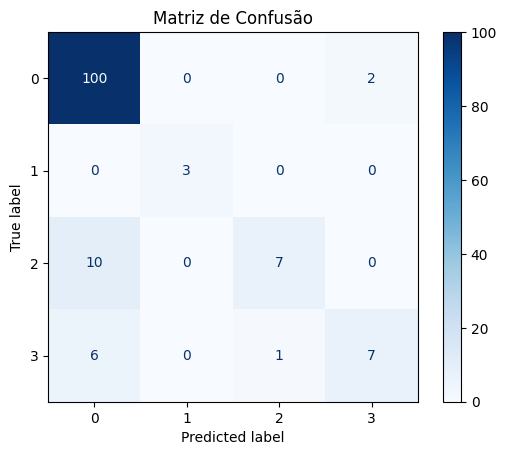

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar o objeto de visualização
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Plotar a matriz de confusão
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.show()

Para o tópico 2, errou 58% dos elementos. E, para o tópico 3 errou 50%.

O que poderíamos fazer a fim de obtermos melhores resultados:
* Fazer uma busca dos melhores parâmetros para cada um daqueles modelos testados.
* Fazer a modelagem de tópicos com o BERTopic, que utiliza transformers para gerar suas embeddings.

Pretendemos dar continuidade a este trabalho também realizando:
- Projeção de Embeddings em 2D com UMAP (Técnica de redução de dimensionalidade não linear, revelando clusters de conceitos semelhantes).
- Geração de "Wordclouds".